# Shopify Data Science Intern Challenge
#### Written by Matthieu Martin <br>
Would just like to note that as order_amount was unlabelled in terms of currency, I have therefore used Pounds. If it was Euros, Dollars or perhaps Tanzanian Shillings, I profusely aplogise.

In [51]:
#importing all required modules (love pandas <3)
import csv
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import trim_mean

In [33]:
#converting csv file to dataframe to csv file for some exploratory data analysis
sneaker_df = pd.read_csv('shopifyChallengeData.csv')
print(sneaker_df.head())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  


In [53]:
#verifying the mean value is as stated in the prompt
print(f"Average sneaker order amount: £{sneaker_df['order_amount'].mean()}")

Average sneaker order amount: £3145.128


As it was specified in the question, we can see that the average order amount is very high - the values shown in our preliminary inspection of the first 5 rows of the data show that the average amount should be in the 3 digits range. This means that there is most likely some very outlying values in our dataset, and we can confirm this by finding the maximum values.

In [55]:
print(f"Most expensive sneaker order: £{sneaker_df['order_amount'].max()}")
print(f"Number of sneaker orders that cost more than £5000: {sneaker_df.order_amount[sneaker_df.order_amount > 5000].count()}")
print(f"Number of Orders in dataset: {len(sneaker_df)}")

Most expensive sneaker order: £704000
Number of sneaker orders that cost more than £5000: 63
Number of Orders in dataset: 5000


By running some quick queries on our dataset, we can see that our maximum order amount is £704000 - an absurd amount for shoes. There are also 63 pairs of shoes that have been sold for over £5000. This means that we have some very rich customers and those shoes have been bought as collectors items - shoes can be sold for extortionate rates because of rarity and demand. This could mean that the user may be using a bot to automate buying shoes for reselling, and this account may need to be checked if this violates the user terms of service. The other possible explanation is that there has been some kind of error collecting our shoe prices, and this should also be checked. Either way, to obtain a more accurate value for our average shoe, we can either use the median to find the middle of our shoe data set, or we can find an average value while discounting our top and bottom average shoe order prices. We can also create a histogram to show the distribution of our shoe prices of our lower value orders, because who doesn't love graphs in data science! (But more seriously, this will show us the distribution of our lower value orders, which you may be interested in.)

Median shoe price: £284.0
Average shoe price while discounting the top and bottom 5%: £294


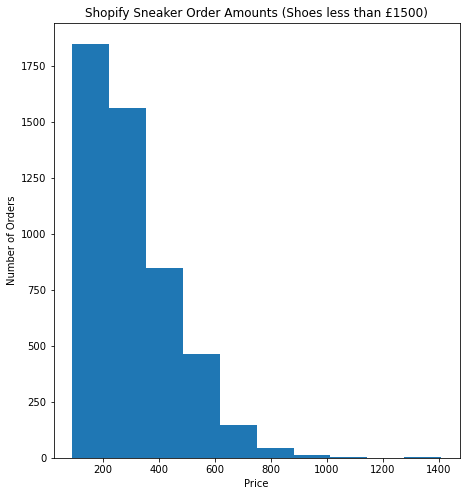

In [70]:
#finding median
print(f"Median shoe order price: £{sneaker_df['order_amount'].median()}")

#finding trimmed mean
trmean_orderAmount = trim_mean(sneaker_df.order_amount, proportiontocut=0.05)
print(f"Average shoe order price while discounting the top and bottom 5%: £{round(trmean_orderAmount)}")

#making figure sizes
plt.figure(figsize=(16, 8))

#creating histogram
plt.subplot(1,2,1)
plt.hist(sneaker_df.order_amount[sneaker_df.order_amount < 1500])
plt.title('Shopify Sneaker Order Amounts (Shoes less than £1500)')
plt.xlabel('Price')
plt.ylabel('Number of Orders')
plt.show()

From this histogram, we can see that there is a left-skewed distribution. This means that most of our orders are in fact under £200, but the average prices are carried above this value because of more expensive orders that carry a heavier weight. This means that the median value of this data set would show the true middle of the amounts that customers spend on their sneaker orders at Shopify.